In [1]:
import math 
import matplotlib.pyplot as plt 
import keras 
import pandas as pd 
import numpy as np 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM 
from keras.layers import Dropout 
from keras.layers import * 
from sklearn .preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split 
from keras.callbacks import EarlyStopping
df=pd.read_csv("HistoricalPrices.csv")
df.head(5)

Using TensorFlow backend.
/Users/mrli/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mrli/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mrli/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/mrli/opt/anaconda3/lib/python3.7/site-pa

,Date,Open,High,Low,Close
0,1/2/1985,165.37,167.12,165.25,165.37
1,1/3/1985,164.57,166.07,164.44,164.57
2,1/4/1985,163.68,164.56,163.43,163.68
3,1/7/1985,164.24,164.62,163.74,164.24
4,1/8/1985,163.99,164.49,163.99,163.99


In [2]:
training_set = df.iloc[:7818, 1:2].values 
test_set = df.iloc[7818:, 1:2].values

In [3]:
# 特征缩放
sc = MinMaxScaler(feature_range = (0, 1)) 
training_set_scaled = sc.fit_transform(training_set)
# 创建一个具有 60 个时间步长和 1 个输出的数据结构
X_train = [] 
y_train = [] 
for i in range(60, 7818): 
    X_train.append(training_set_scaled[i-60:i, 0]) 
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 

In [4]:
# for idx, val in enumerate(training_set_scaled):
#     print(idx , " ", val)

In [5]:
# # Feature Scaling
# sc = MinMaxScaler(feature_range = (0, 1))
# training_set_scaled = sc.fit_transform(training_set)
# # Creating a data structure with 60 time-steps and 1 output
# X_train = []
# y_train = []
# for i in range(60, 7817):
#     X_train.append(training_set_scaled[i-60:i, 0])
#     y_train.append(training_set_scaled[i, 0])
# X_train, y_train = np.array(X_train), np.array(y_train)
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# print(X_train.shape)

In [6]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 60))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 20, batch_size = 32)


Epoch 1/20
7758/7758 [==============================] - 168s 22ms/step - loss: 0.0063
Epoch 2/20
7758/7758 [==============================] - 177s 23ms/step - loss: 0.0019
Epoch 3/20
7758/7758 [==============================] - 140s 18ms/step - loss: 0.0016
Epoch 4/20
7758/7758 [==============================] - 142s 18ms/step - loss: 0.0014
Epoch 5/20
7758/7758 [==============================] - 152s 20ms/step - loss: 0.0013
Epoch 6/20
7758/7758 [==============================] - 167s 21ms/step - loss: 0.0013
Epoch 7/20
7758/7758 [==============================] - 150s 19ms/step - loss: 0.0012
Epoch 8/20
7758/7758 [==============================] - 149s 19ms/step - loss: 0.0011
Epoch 9/20
7758/7758 [==============================] - 180s 23ms/step - loss: 0.0011
Epoch 10/20
7758/7758 [==============================] - 170s 22ms/step - loss: 0.0010
Epoch 11/20
7758/7758 [==============================] - 141s 18ms/step - loss: 9.2939e-04
Epoch 12/20
7758/7758 [========================

In [25]:
dataset_train = df.iloc[:7817, 1:2]
dataset_test = df.iloc[7817:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1425):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(1365, 60, 1)


In [26]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price

array([[0.9629751 ],
       [0.96303004],
       [0.9615763 ],
       ...,
       [1.674521  ],
       [1.6753039 ],
       [1.6756577 ]], dtype=float32)

In [27]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

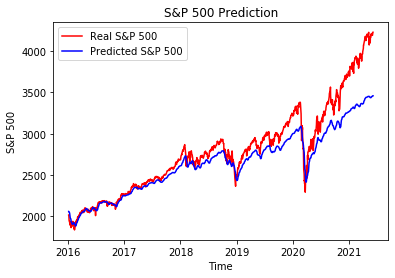

In [28]:
dates = pd.to_datetime(df["Date"])
plt.plot(dates.loc[7817:],dataset_test.values, color = 'red', label = 'Real S&P 500')
plt.plot(dates.loc[7817:],predicted_stock_price, color = 'blue', label = 'Predicted S&P 500')
plt.title('S&P 500 Prediction')
plt.xlabel('Time')
plt.ylabel('S&P 500')
plt.legend()
plt.savefig("S&P 500 LSTM Prediction.png", dpi = 300)
plt.show()